In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols)
df.head() # a row represents one item

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [7]:
#turning the Categorical data into ones and zeros
# label_class = LabelEncoder()
# df['class'] = label_class.fit_transform(df['class'])
#OR
df['class'] = (df['class'] == "g").astype(int) #Specifying the 1 and 0 Category

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


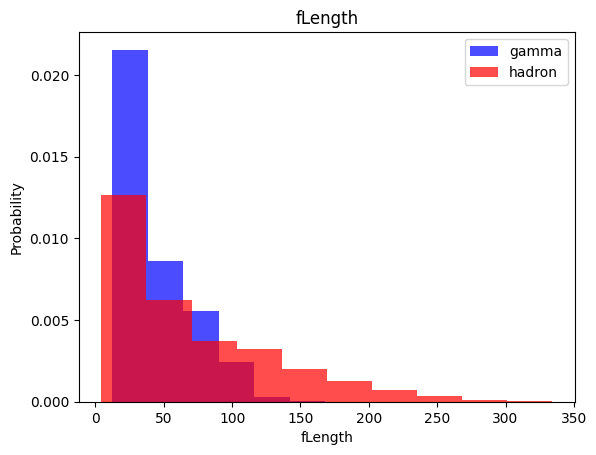

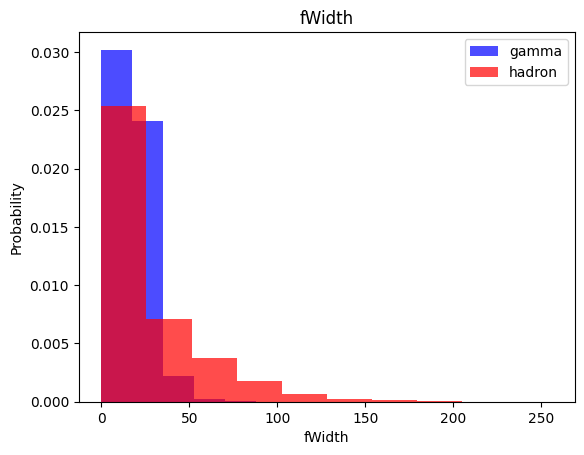

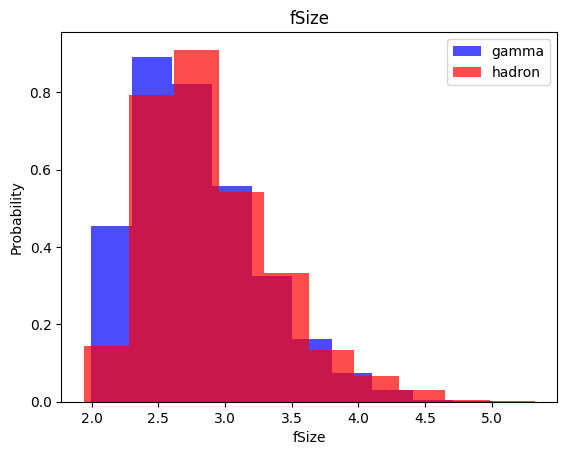

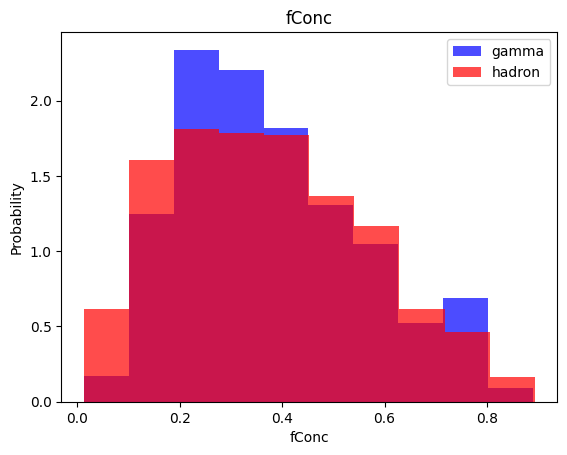

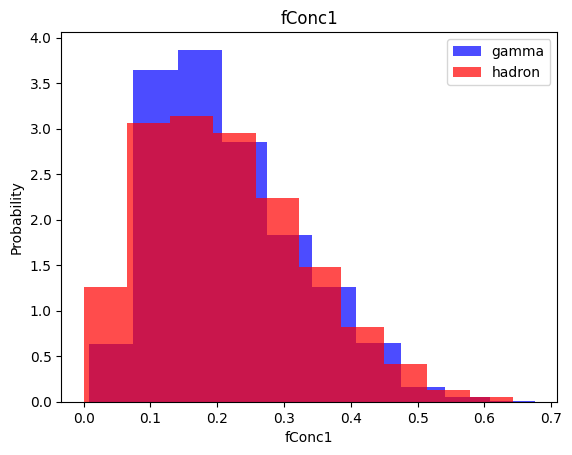

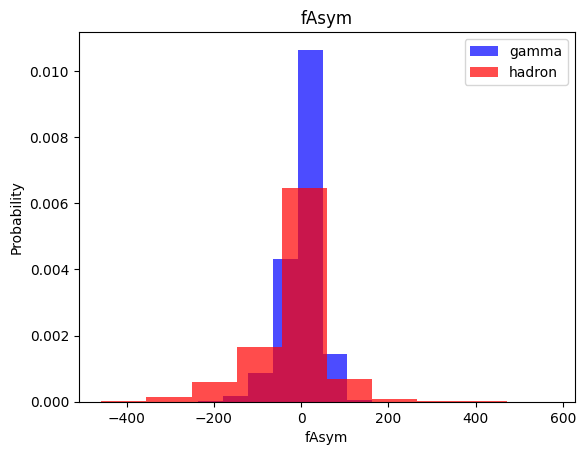

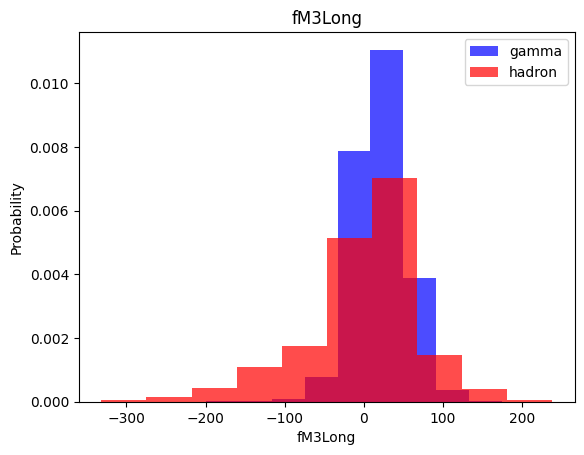

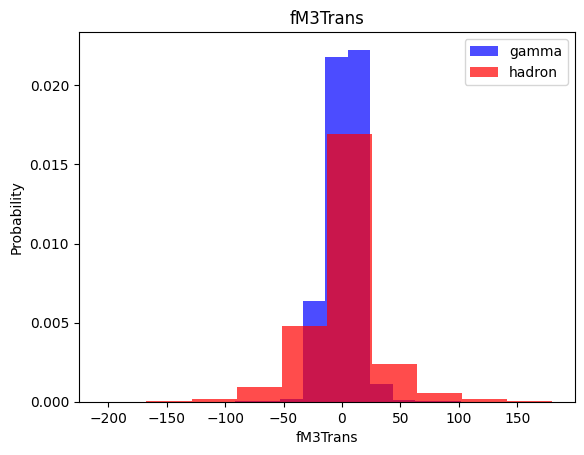

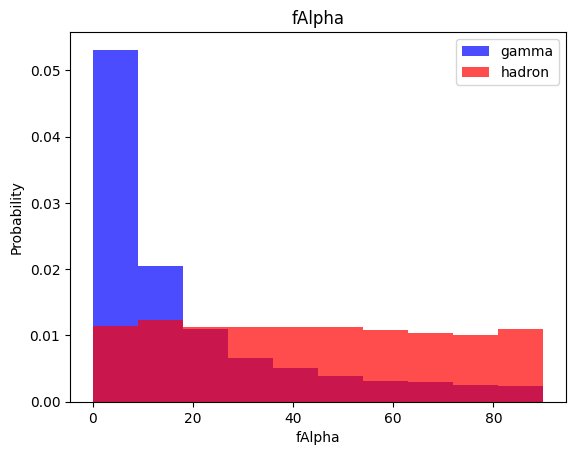

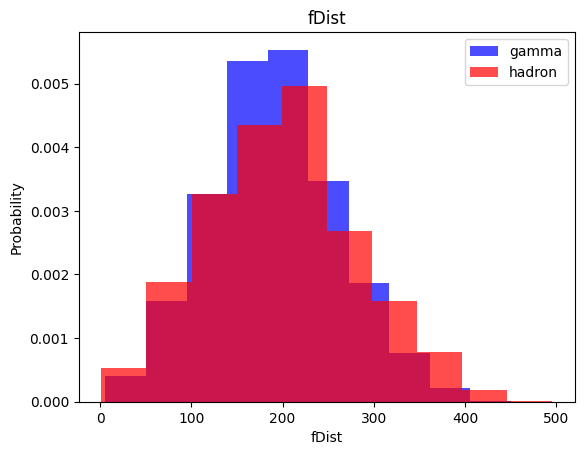

In [9]:
for variable in cols[:-1]:
    plt.hist(df[df['class'] == 1][variable], color='blue', label='gamma',alpha=0.7 ,density=True)
    plt.hist(df[df['class'] == 0][variable], color='red', label='hadron',alpha=0.7 ,density=True)
    plt.title(variable)
    plt.ylabel('Probability')
    plt.xlabel(variable)
    plt.legend()
    plt.show()

Separating the Dataset into Training and Testing

In [10]:
X = df.drop('class', axis=1)
y = df['class']

Splitting Train and Test Dataset (Rows)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=41) 

Using a Standard Scaler to Reduce Variance between Data

In [12]:
#Applying Standard scaling to get optimized result. Alot of time sets it up from 0 to 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)#don't refit the Data

In [13]:
print(len(y_train==1))#gamma
print(len(y_train==0))#hadron

15216
15216


kNN Classification Model Implementation

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# creating the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train) #X train dataset and y_train which is the prediction
# predicting the test set results
y_pred = knn_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74      1374
           1       0.83      0.94      0.88      2430

    accuracy                           0.84      3804
   macro avg       0.85      0.80      0.81      3804
weighted avg       0.84      0.84      0.83      3804



In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train) #fit Trained Dataset
y_pred = nb_model.predict(X_test)# predict test Dataset

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.37      0.49      1374
           1       0.72      0.92      0.81      2430

    accuracy                           0.72      3804
   macro avg       0.72      0.64      0.65      3804
weighted avg       0.72      0.72      0.69      3804



Logistic Regression Implementation

In [19]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.58      0.66      1374
           1       0.79      0.90      0.84      2430

    accuracy                           0.79      3804
   macro avg       0.78      0.74      0.75      3804
weighted avg       0.78      0.79      0.78      3804



SVM Implementation

In [20]:
from sklearn.svm import SVC
sv_model = SVC()
sv_model.fit(X_train, y_train)
y_pred = sv_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.78      1374
           1       0.85      0.96      0.90      2430

    accuracy                           0.86      3804
   macro avg       0.87      0.83      0.84      3804
weighted avg       0.87      0.86      0.86      3804



Tensor Flow Neural Networks Implementation

In [21]:
#defining plot functions
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label = 'accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [22]:
#building our model
import tensorflow as tf
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(0.2),#dropout means randomly choose certain nodes
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')#output Layer. We are projecting our predictions to be either 0 or 1
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])# in order to plot it in a graph

c:\Users\Randy\Desktop\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
history = nn_model.fit(X_train,y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7627 - loss: 0.5296 - val_accuracy: 0.8180 - val_loss: 0.3969
Epoch 2/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8202 - loss: 0.4105 - val_accuracy: 0.8361 - val_loss: 0.3742
Epoch 3/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8252 - loss: 0.4043 - val_accuracy: 0.8459 - val_loss: 0.3595
Epoch 4/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8351 - loss: 0.3866 - val_accuracy: 0.8522 - val_loss: 0.3506
Epoch 5/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8455 - loss: 0.3657 - val_accuracy: 0.8630 - val_loss: 0.3404
Epoch 6/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8449 - loss: 0.3725 - val_accuracy: 0.8564 - val_loss: 0.3376
Epoch 7/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8550 - loss: 0.3567 - val_accuracy: 0.8617 - val_loss: 0.3298
Epoch 8/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8540 - loss: 0.3522 - val_accu

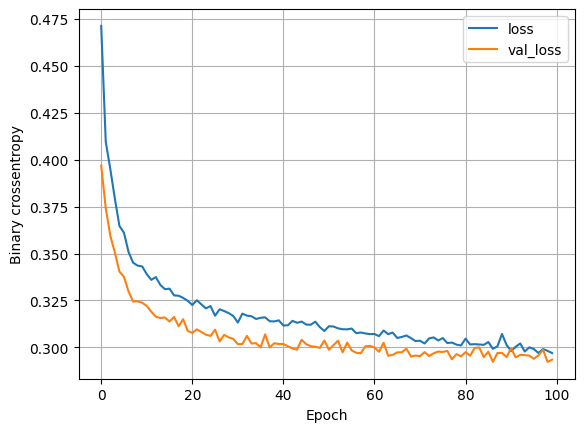

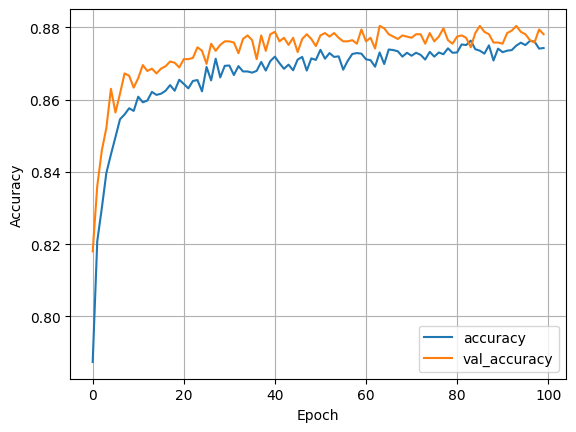

In [24]:
#plotting loss and accuracy of the model above
plot_loss(history) #loss decreases as the cycles(Epoch) increases
plot_accuracy(history) #accuracy increases as the number of Epoch(cycles) increases

In [25]:
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1) #changing them to categorical values. Reshaping it into one dimensional
#Running the classification report
print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1374
           1       0.87      0.93      0.90      2430

    accuracy                           0.86      3804
   macro avg       0.86      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Linear Regression Implementation

In [26]:
#loading Library Directly from seaborn library
import seaborn as sns

iris_ds = sns.load_dataset('iris')
iris_ds

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


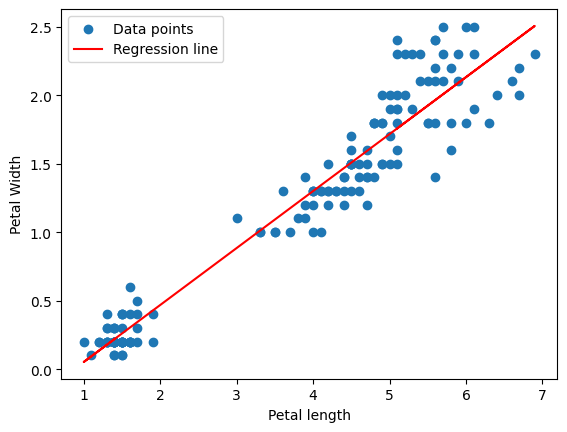

y-intercept: -0.36307552131902887
slope: 0.4157554163524115
correlation coefficient: 0.9628654314027965
p-value: 4.6750039073244384e-86


In [27]:
from scipy import stats
X = iris_ds['petal_length']
y = iris_ds['petal_width']

# Method 1
slope, intercept, r, p, std_err = stats.linregress(X, y)
y_values = slope * X + intercept 
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.scatter(X,y, label='Data points')

plt.plot(X, y_values, color='red', label='Regression line')
plt.legend()
plt.show()

#y intercept
print("y-intercept:", intercept)
#slope
print("slope:", slope)
#correlation
print("correlation coefficient:", r)
#p value
print("p-value:", p)

In [33]:
# Extracting features and target as numpy arrays
X = iris_ds['petal_length'].to_numpy()
y = iris_ds['petal_width'].to_numpy()

# Reshape X and y to ensure they are 2D arrays
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
# Splitting data correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [34]:
# Creating our model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Training the model by fitting X and y train
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
# y = mx + c
# c = y-intercept
c = lr.intercept_
c

array([-0.35666804])

In [36]:
# m = slope
m = lr.coef_
m

array([[0.41323829]])

In [44]:
# y -> predicted value
# y_pred = m*X_train + c
# or
y_train_pred = lr.predict(X_train)
y_train_pred

array([[0.05657025],
       [0.2631894 ],
       [1.46158045],
       [0.30451323],
       [0.18054174],
       [1.70952343],
       [1.50290428],
       [0.2631894 ],
       [0.22186557],
       [0.2631894 ],
       [1.75084726],
       [1.50290428],
       [1.58555194],
       [0.18054174],
       [0.2631894 ],
       [1.17231365],
       [1.75084726],
       [1.91614257],
       [1.46158045],
       [2.16408555],
       [1.37893279],
       [2.3707047 ],
       [1.50290428],
       [0.22186557],
       [2.41202853],
       [1.33760896],
       [0.22186557],
       [0.18054174],
       [0.42848472],
       [1.08966599],
       [1.6681996 ],
       [0.42848472],
       [0.30451323],
       [0.34583706],
       [1.37893279],
       [0.2631894 ],
       [1.37893279],
       [2.41202853],
       [0.22186557],
       [1.42025662],
       [1.70952343],
       [0.22186557],
       [1.62687577],
       [1.75084726],
       [1.29628513],
       [1.50290428],
       [1.87481874],
       [1.296

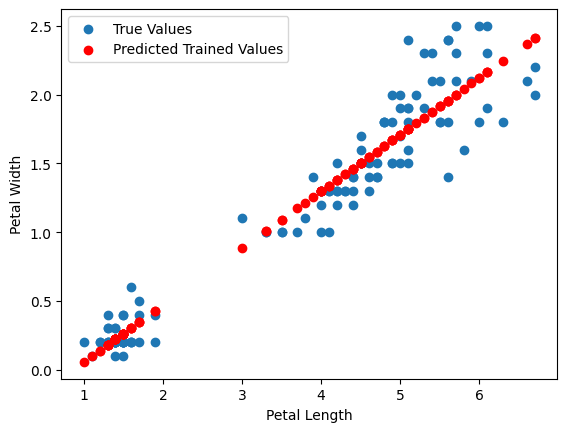

In [47]:
plt.scatter(X_train, y_train, label='True Values')
plt.scatter(X_train, y_train_pred, color='r', label='Predicted Trained Values')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

We can Now Predict our X_test

In [39]:
y_test_pred = lr.predict(X_test)

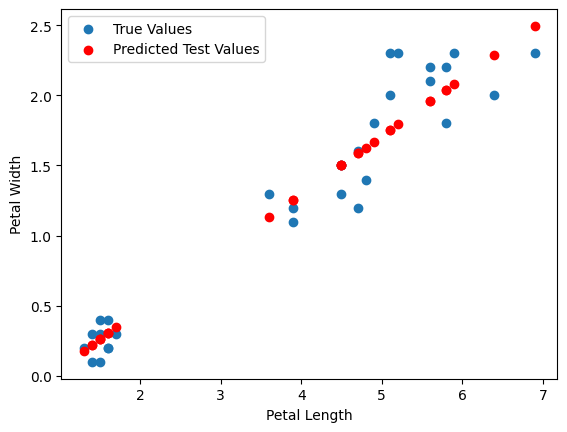

In [42]:
# Plot the results
plt.scatter(X_test, y_test, label='True Values')
plt.scatter(X_test, y_test_pred, color='r', label='Predicted Test Values')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()